In [1]:
from osgeo import gdal
import numpy as np
import pandas as pd
import richdem as rd
import matplotlib.pyplot as plt
import os
import glob

Constantes

In [2]:
PATH = './images/images_all_10px_12000/'
RES_DATA = './results/data_all_10px_12000.csv'

Graficar la data

In [14]:
from operator import contains


class DefaultMetaObj:
    geotransform = [0,1,0,0,0,-1]

class DataGenerator:
    def __init__(self, directory):
        self.files = []
        self.files.extend(glob.glob(os.path.join(directory, "*.tif")))

        # non_files = []
        # non_files.extend(glob.glob(os.path.join(directory, "non_pre_landsdlide_test_*.tif")))
        
        # self.files = sorted(files + non_files)
    
    def __getitem__(self, index: int):   
        filename = self.files[index]
        fileSat = 'landsat7' if 'landsat7' in os.path.split(filename)[1] else 'landsat8' if 'landsat8' in os.path.split(filename)[1] else 'sentinel2'
        fileId = (os.path.split(filename)[1]
        .replace("_landsat7_", "")
        .replace("_landsat8_", "")
        .replace("_sentinel2_", "")
        .replace("non_", "").replace("pre_landsdlide_test_", "").replace(".tif", ""))
        gdal_data = gdal.Open(filename)
        bands = { gdal_data.GetRasterBand(i + 1).GetDescription(): i for i in range(gdal_data.RasterCount) }

        for band in bands.keys():
            bands[band] = gdal_data.ReadAsArray().astype(float)[bands[band]]

        return fileId, fileSat, bands

    def __center_crop__(self, img, new_width=None, new_height=None):        

        width = img.shape[1]
        height = img.shape[0]

        if new_width is None:
            new_width = min(width, height)

        if new_height is None:
            new_height = min(width, height)

        left = int(np.ceil((width - new_width) / 2))
        right = width - int(np.floor((width - new_width) / 2))

        top = int(np.ceil((height - new_height) / 2))
        bottom = height - int(np.floor((height - new_height) / 2))

        if len(img.shape) == 2:
            center_cropped_img = img[top:bottom, left:right]
        else:
            center_cropped_img = img[top:bottom, left:right, ...]

        return center_cropped_img

    def getData(self):
        output = pd.DataFrame()
        for i in range(len(self.files)):
            fileId, fileSat, data = self.__getitem__(i)
            
            # Landslide Id
            dictData = {
                'landslide_id': int(fileId),
                'satellite': fileSat
            }
            
            # Elevation
            elevation = rd.rdarray(data['elevation'], no_data=np.nan, meta_obj=DefaultMetaObj())
            elevation_data =  self.__center_crop__(elevation, 5, 5)
            dictData.update({
                'elevation_1': elevation_data[0][0], 'elevation_6': elevation_data[0][1],  'elevation_11': elevation_data[0][2], 'elevation_16': elevation_data[0][3], 'elevation_21': elevation_data[0][4], 
                'elevation_2': elevation_data[1][0], 'elevation_7': elevation_data[1][1],  'elevation_12': elevation_data[1][2], 'elevation_17': elevation_data[1][3], 'elevation_22': elevation_data[1][4], 
                'elevation_3': elevation_data[2][0], 'elevation_8': elevation_data[2][1],  'elevation_13': elevation_data[2][2], 'elevation_18': elevation_data[2][3], 'elevation_23': elevation_data[2][4], 
                'elevation_4': elevation_data[3][0], 'elevation_9': elevation_data[3][1],  'elevation_14': elevation_data[3][2], 'elevation_19': elevation_data[3][3], 'elevation_24': elevation_data[3][4], 
                'elevation_5': elevation_data[4][0], 'elevation_10': elevation_data[4][1], 'elevation_15': elevation_data[4][2], 'elevation_20': elevation_data[4][3], 'elevation_25': elevation_data[4][4]
            })


            # Slope (degrees)
            # slope = rd.rdarray(data['slope'], no_data=np.nan, meta_obj=DefaultMetaObj())
            slope = rd.TerrainAttribute(elevation, attrib='slope_degrees', zscale=0.1)
            slope =  self.__center_crop__(slope, 5, 5)
            dictData.update({
                'slope_1': slope[0][0], 'slope_6': slope[0][1],  'slope_11': slope[0][2], 'slope_16': slope[0][3], 'slope_21': slope[0][4], 
                'slope_2': slope[1][0], 'slope_7': slope[1][1],  'slope_12': slope[1][2], 'slope_17': slope[1][3], 'slope_22': slope[1][4], 
                'slope_3': slope[2][0], 'slope_8': slope[2][1],  'slope_13': slope[2][2], 'slope_18': slope[2][3], 'slope_23': slope[2][4], 
                'slope_4': slope[3][0], 'slope_9': slope[3][1],  'slope_14': slope[3][2], 'slope_19': slope[3][3], 'slope_24': slope[3][4], 
                'slope_5': slope[4][0], 'slope_10': slope[4][1], 'slope_15': slope[4][2], 'slope_20': slope[4][3], 'slope_25': slope[4][4]
            })
            
            # Aspect
            aspect = rd.TerrainAttribute(elevation, attrib='aspect', zscale=0.1)
            aspect =  self.__center_crop__(aspect, 5, 5)
            dictData.update({
                'aspect_1': aspect[0][0], 'aspect_6': aspect[0][1],  'aspect_11': aspect[0][2], 'aspect_16': aspect[0][3], 'aspect_21': aspect[0][4], 
                'aspect_2': aspect[1][0], 'aspect_7': aspect[1][1],  'aspect_12': aspect[1][2], 'aspect_17': aspect[1][3], 'aspect_22': aspect[1][4], 
                'aspect_3': aspect[2][0], 'aspect_8': aspect[2][1],  'aspect_13': aspect[2][2], 'aspect_18': aspect[2][3], 'aspect_23': aspect[2][4], 
                'aspect_4': aspect[3][0], 'aspect_9': aspect[3][1],  'aspect_14': aspect[3][2], 'aspect_19': aspect[3][3], 'aspect_24': aspect[3][4], 
                'aspect_5': aspect[4][0], 'aspect_10': aspect[4][1], 'aspect_15': aspect[4][2], 'aspect_20': aspect[4][3], 'aspect_25': aspect[4][4]
            })
            
            # Planform Curvature
            placurv = rd.TerrainAttribute(elevation, attrib='planform_curvature', zscale=0.1)
            placurv =  self.__center_crop__(placurv, 5, 5)
            dictData.update({
                'placurv_1': placurv[0][0], 'placurv_6': placurv[0][1],  'placurv_11': placurv[0][2], 'placurv_16': placurv[0][3], 'placurv_21': placurv[0][4], 
                'placurv_2': placurv[1][0], 'placurv_7': placurv[1][1],  'placurv_12': placurv[1][2], 'placurv_17': placurv[1][3], 'placurv_22': placurv[1][4], 
                'placurv_3': placurv[2][0], 'placurv_8': placurv[2][1],  'placurv_13': placurv[2][2], 'placurv_18': placurv[2][3], 'placurv_23': placurv[2][4], 
                'placurv_4': placurv[3][0], 'placurv_9': placurv[3][1],  'placurv_14': placurv[3][2], 'placurv_19': placurv[3][3], 'placurv_24': placurv[3][4], 
                'placurv_5': placurv[4][0], 'placurv_10': placurv[4][1], 'placurv_15': placurv[4][2], 'placurv_20': placurv[4][3], 'placurv_25': placurv[4][4]
            })
            
            # Profile Curvature
            procurv = rd.TerrainAttribute(elevation, attrib='profile_curvature', zscale=0.1)
            procurv =  self.__center_crop__(procurv, 5, 5)
            dictData.update({
                'procurv_1': procurv[0][0], 'procurv_6': procurv[0][1],  'procurv_11': procurv[0][2], 'procurv_16': procurv[0][3], 'procurv_21': procurv[0][4], 
                'procurv_2': procurv[1][0], 'procurv_7': procurv[1][1],  'procurv_12': procurv[1][2], 'procurv_17': procurv[1][3], 'procurv_22': procurv[1][4], 
                'procurv_3': procurv[2][0], 'procurv_8': procurv[2][1],  'procurv_13': procurv[2][2], 'procurv_18': procurv[2][3], 'procurv_23': procurv[2][4], 
                'procurv_4': procurv[3][0], 'procurv_9': procurv[3][1],  'procurv_14': procurv[3][2], 'procurv_19': procurv[3][3], 'procurv_24': procurv[3][4], 
                'procurv_5': procurv[4][0], 'procurv_10': procurv[4][1], 'procurv_15': procurv[4][2], 'procurv_20': procurv[4][3], 'procurv_25': procurv[4][4]
            })

            # Save in dataframe
            output = pd.concat([output, pd.DataFrame(dictData, index=[fileId])])
        
        return output 

    def plotData(self, i):
        output = pd.DataFrame()
        fileId, fileSat, data = self.__getitem__(i)
        
        # Landslide Id
        dictData = {
            'landslide_id': int(fileId),
            'satellite': fileSat
        }
        
        # Elevation
        elevation = rd.rdarray(data['elevation'], no_data=np.nan, meta_obj=DefaultMetaObj())
        # elevation_data =  self.__center_crop__(elevation, 5, 5)
        rd.rdShow(elevation, axes=False, cmap='jet', figsize=(8, 5.5))
        plt.show()


        # Slope (degrees)
        # slope = rd.rdarray(data['slope'], no_data=np.nan, meta_obj=DefaultMetaObj())
        slope = rd.TerrainAttribute(elevation, attrib='slope_degrees', zscale=0.1)
        # slope =  self.__center_crop__(slope, 5, 5)
        rd.rdShow(slope, axes=False, cmap='cividis', figsize=(8, 5.5))
        plt.show()
        
        # Aspect
        aspect = rd.TerrainAttribute(elevation, attrib='aspect', zscale=0.1)
        # aspect =  self.__center_crop__(aspect, 5, 5)
        rd.rdShow(aspect, axes=False, cmap='cividis', figsize=(8, 5.5))
        plt.show()
        
        # Planform Curvature
        placurv = rd.TerrainAttribute(elevation, attrib='planform_curvature', zscale=0.1)
        # placurv =  self.__center_crop__(placurv, 5, 5)
        rd.rdShow(placurv, axes=False, cmap='seismic', figsize=(8, 5.5))
        plt.show()
        
        # Profile Curvature
        procurv = rd.TerrainAttribute(elevation, attrib='profile_curvature', zscale=0.1)
        # procurv =  self.__center_crop__(procurv, 5, 5)
        rd.rdShow(procurv, axes=False, cmap='seismic', figsize=(8, 5.5))
        plt.show()      
                  

In [15]:
dg = DataGenerator(PATH)

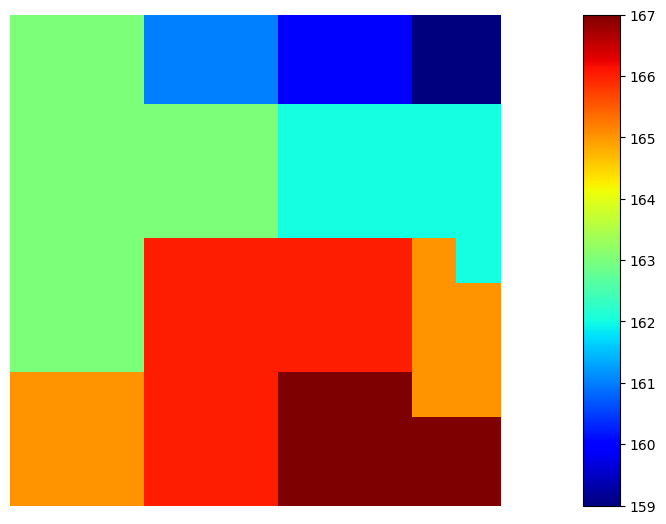

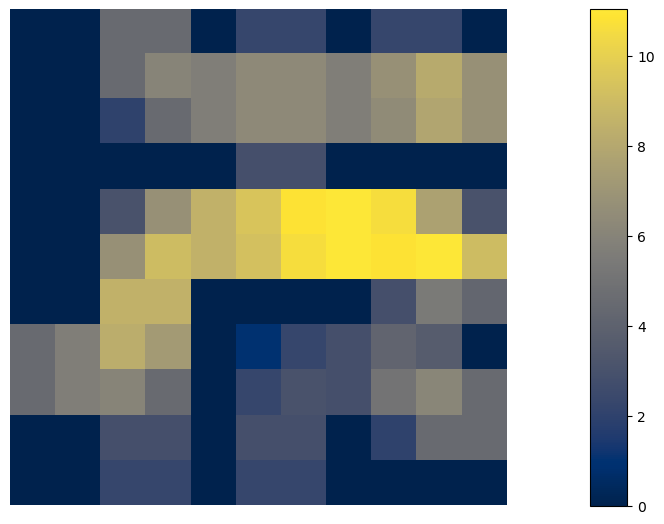

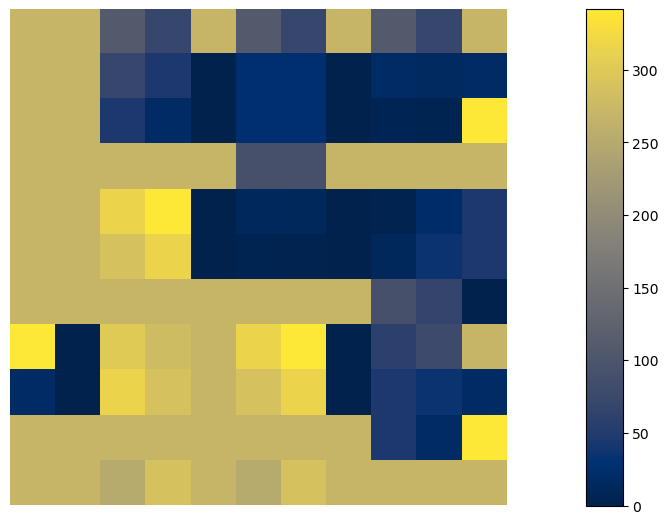

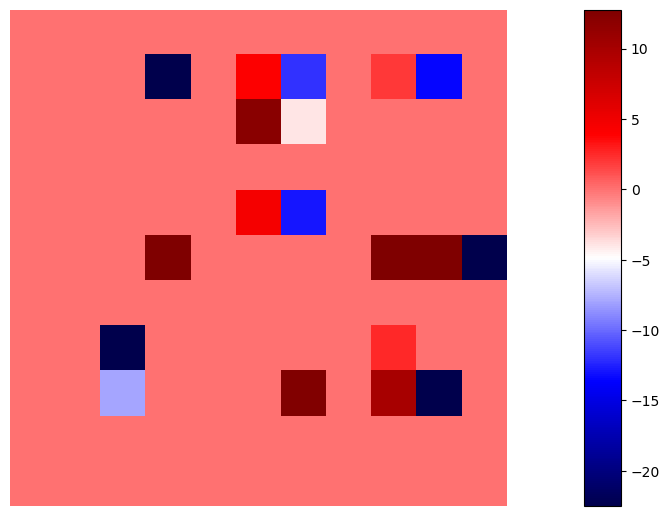

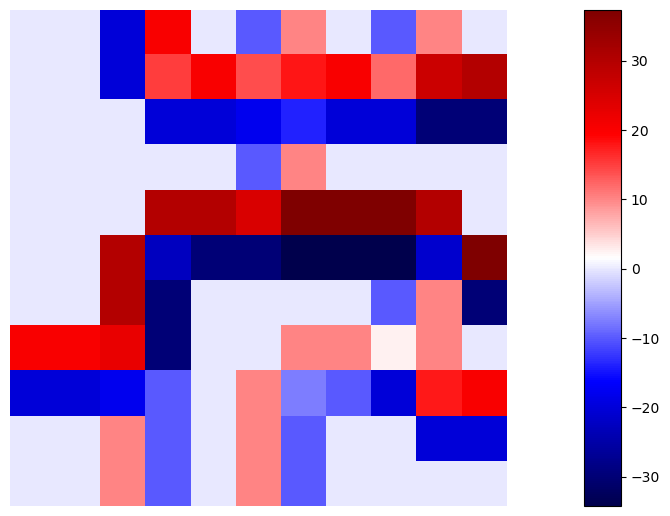

In [16]:
dg.plotData(0)

In [8]:
data = dg.getData()

[[163. 163. 163. 161. 161. 161. 160. 160. 160. 159. 159.]
 [163. 163. 163. 161. 161. 161. 160. 160. 160. 159. 159.]
 [163. 163. 163. 163. 163. 163. 162. 162. 162. 162. 162.]
 [163. 163. 163. 163. 163. 163. 162. 162. 162. 162. 162.]
 [163. 163. 163. 163. 163. 163. 162. 162. 162. 162. 162.]
 [163. 163. 163. 166. 166. 166. 166. 166. 166. 165. 162.]
 [163. 163. 163. 166. 166. 166. 166. 166. 166. 165. 165.]
 [163. 163. 163. 166. 166. 166. 166. 166. 166. 165. 165.]
 [165. 165. 165. 166. 166. 166. 167. 167. 167. 165. 165.]
 [165. 165. 165. 166. 166. 166. 167. 167. 167. 167. 167.]
 [165. 165. 165. 166. 166. 166. 167. 167. 167. 167. 167.]]
[[ 0.         0.         4.5202274  4.5202274  0.         2.263636
   2.263636   0.         2.263636   2.263636   0.       ]
 [ 0.         0.         4.5202274  6.0544987  5.710593   6.37937
   6.37937    5.710593   6.762861   8.1112795  6.762861 ]
 [ 0.         0.         2.0248682  4.5202274  5.710593   6.37937
   6.37937    5.710593   6.457955   7.8609586 

KeyboardInterrupt: 

In [15]:
len(data)

10808

In [16]:
data.to_csv(RES_DATA)  